In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [31]:
df = pd.read_csv('Student_Performance.csv')

In [32]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [34]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [35]:
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])
# yes = 1
# no = 0

In [36]:
X = df.drop(columns='Performance Index').values
y = df['Performance Index'].values

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [38]:
class MultipleRegression:

    def __init__(self):

        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, Y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        # Calculating each beta (B0, B1, B2...Bn) 
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(Y_train)

        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X_test):

        y_hat = np.dot(X_test, self.coef_) + self.intercept_
        return y_hat
        
        
        

In [39]:
obj = MultipleRegression()

In [40]:
obj.fit(X_train, Y_train)

In [41]:
print("Intercept is : ",obj.intercept_)
print("Betas are : ",obj.coef_)

Intercept is :  -34.17752765121582
Betas are :  [2.85352109 1.01959723 0.59483017 0.48314352 0.1977199 ]


In [42]:
y_pred = obj.predict(X_test)

In [43]:
print("R2 Score is : ", r2_score(Y_test, y_pred))

R2 Score is :  0.9890954655668953


Actual vs. Predicted: Y_train size: 8000, y_pred size: 2000


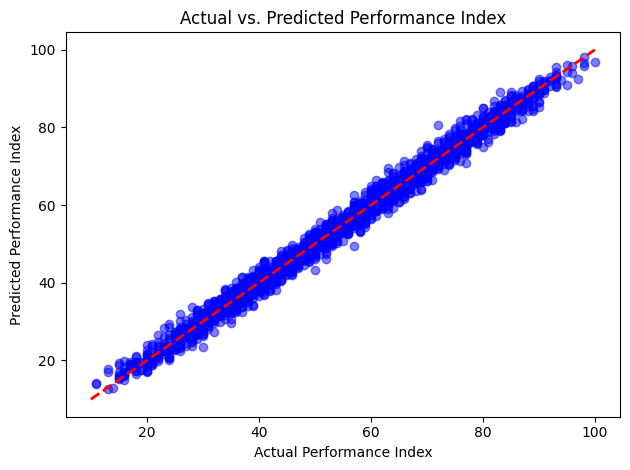

In [44]:
print(f"Actual vs. Predicted: Y_train size: {Y_train.shape[0]}, y_pred size: {y_pred.shape[0]}")
plt.scatter(Y_test, y_pred, color='blue', alpha=0.5)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs. Predicted Performance Index')
plt.tight_layout()
plt.show()